<img src="https://avatars.githubusercontent.com/u/74911464?s=200&v=4"
     alt="OpenEO Platform logo"
     style="float: left; margin-right: 10px;" />
## openEO Platform: Seasonal Soil Moisture over Austria

A simple notebook for creating an overview of the Austrian soil moisture for 2020  

In [26]:
import openeo
import matplotlib.pyplot as plt
import xarray as xr

from pathlib import PosixPath
from eo_utils import openeoMap 
from openeo.util import to_bbox_dict

In [27]:
conn = openeo.connect("openeo.cloud")
conn.authenticate_oidc(provider_id="egi")

Authenticated using refresh token.


<Connection to 'https://openeocloud.vito.be/openeo/1.0.0/' with OidcBearerAuth>

In [28]:
center = [47.657741, 13.483181]
zoom = 7.3

eoMap = openeoMap(center,zoom)
eoMap.map

Map(center=[47.657741, 13.483181], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [29]:
conn.list_collections()

[{'description': 'Sentinel 1 GRD Sigma0, mosaic of all ascending relative orbits. Backscatter values are provided as natural number, not in decibel. Provided by Terrascope.\n\n Use [this viewer](https://viewer.terrascope.be/?language=en&bbox=2.8531494643539195,50.29627033037724,6.36877446435392,51.454777120718546&overlay=true&bgLayer=Satellite&date=2020-10-15&layer=CGS_S1_GRD_SIGMA0) to explore the data.',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'S1_GRD_SIGMA0_ASCENDING',
  'keywords': ['VITO',
   'TERRASCOPE',
   'COPERNICUS',
   'ESA',
   'Orthoimagery',
   'SENTINEL-1',
   'C-SAR',
   'Level-3',
   'Radar',
   'Radar Backscatter'],
  'license': 'free',
  'links': [{'href': 'https://docs.terrascope.be/#/DataProducts/Sentinel-1/ProductsOverview',
    'rel': 'alternate',
    'title': 'Product web page.'},
   {'href': 'https://services.terrascope.be/wmts/v2',
    'rel': 'wmts',
    'wmts:layer': 'CGS_S1_GRD_SIGMA0'}],
  'providers': [{'name': 'Terrascope/VITO'}],
  'stac_extensions': ['datacube'],
  'stac_version': '0.9.0',
  'title': 'Sentinel 1 GRD Sigma0 product, VH, VV and angle.'},
 {'description': 'Sentinel 1 GRD Sigma0, mosaic of all descending relative orbits. Backscatter values are provided as natural number, not in decibel. Provided by Terrascope.\n\n Use [this viewer](https://viewer.terrascope.be/?language=en&bbox=2.8531494643539195,50.29627033037724,6.36877446435392,51.454777120718546&overlay=true&bgLayer=Satellite&date=2020-10-15&layer=CGS_S1_GRD_SIGMA0) to explore the data.',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'S1_GRD_SIGMA0_DESCENDING',
  'keywords': ['VITO',
   'TERRASCOPE',
   'COPERNICUS',
   'ESA',
   'Orthoimagery',
   'SENTINEL-1',
   'C-SAR',
   'Level-3',
   'Radar',
   'Radar Backscatter'],
  'license': 'free',
  'links': [{'href': 'https://docs.terrascope.be/#/DataProducts/Sentinel-1/ProductsOverview',
    'rel': 'alternate',
    'title': 'Product web page.'},
   {'href': 'https://services.terrascope.be/wmts/v2',
    'rel': 'wmts',
    'wmts:layer': 'CGS_S1_GRD_SIGMA0'}],
  'providers': [{'name': 'Terrascope/VITO'}],
  'stac_extensions': ['datacube'],
  'stac_version': '0.9.0',
  'title': 'Sentinel 1 GRD Sigma0 product, VH, VV and angle.'},
 {'description': 'FAPAR Level-3 product at 10m resolution. Covers selected areas globally. This FAPAR is derived directly from ESA L2A products. The FAPAR quantifies the fraction of the solar radiation absorbed by live leaves for the photosynthesis activity. Then, it refers only to the green and alive elements of the canopy. The FAPAR depends on the canopy structure, vegetation element optical properties, atmospheric conditions, and angular configuration. \n\nFAPAR is recognized as an Essential Climate Variable (ECV) by the Global Climate Observing System (GCOS).',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'TERRASCOPE_S2_FAPAR_V2',
  'keywords': ['VITO',
   'TERRASCOPE',
   'COPERNICUS',
   'ESA',
   'Orthoimagery',
   'SENTINEL-2',
   'MSI',
   'Level-3',
   'Radiometry',
   'Plant Resource',
   'FAPAR'],
  'license': 'proprietary',
  'links': [{'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice',
    'rel': 'license'},
   {'href': 'https://services.terrascope.be/catalogue/description?collection=urn:eop:VITO:TERRASCOPE_S2_FAPAR_V2',
    'rel': 'alternate'},
   {'href': 'https://viewer.terrascope.be/?language=nl&bbox=0.9339867511378304,50.14520994379217,6.207424251137831,51.77292299745045&overlay=false&bgLayer=MapBox&date=2019-02-25T03:17:15.000Z&layer=CGS_S2_FAPAR',
    'rel': 'alternate',
    'title': 'Terrascope Viewer'},
   {'href': 'https://services.terrascope.be/wmts/v2',
    'rel': 'wmts',
    'wmts:layer': 'CGS_S2_FAPAR'}],
  'providers': [{'name': 'VITO, on

In [30]:
conn.describe_collection("CGLS_SSM_1KM")

{'cube:dimensions': {'bands': {'type': 'bands', 'values': ['B01']},
  't': {'extent': [['2018-12-16T00:00:00', '2022-04-04T00:00:00']],
   'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [2400000.0, 8400000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [0.0, 4800000.0],
   'reference_system': 'PROJCS["Azimuthal_Equidistant",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Azimuthal_Equidistant"],PARAMETER["latitude_of_center",53],PARAMETER["longitude_of_center",24],PARAMETER["false_easting",5837287.81977],PARAMETER["false_northing",2121415.69617],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]',
   'type': 'spatial'}},
 'description': 'The Copernicus Global Land Surface Soil Moisture product (CGLS_SSM) displays the relative water content of the top few centimetres soil, describing how wet or dry the soil is in its topmost layer, expressed in percent saturation. Input for the product are the Sentinel-1 C-band SAR backscatter values. Further information can be found [here] (https://land.copernicus.eu/global/products/ssm) and in Bauer-Marschallinger et al., 2018. ',
 'extent': {'spatial': {'bbox': [[-25.81979937879616,
     31.602457597935924,
     58.39398229109195,
     76.95632595060702]]},
  'temporal': {'interval': [['2018-12-16T00:00:00Z',
     '2022-04-04T00:00:00Z']]}},
 'id': 'CGLS_SSM_1KM',
 'item_assets': {},
 'keywords': ['EODC', 'Copernicus', 'Level-3'],
 'license': 'proprietary',
 'links': [{'href': 'https://openeo.eodc.euv1.0', 'rel': 'root'},
  {'href': 'https://openeo.eodc.euv1.0/collections', 'rel': 'parent'},
  {'href': 'https://openeo.eodc.euv1.0/collections/CGLS_SSM_1KM',
   'rel': 'self'},
  {'href': 'https://openeo.eodc.euv1.0/collections/CGLS_SSM_1KM/items',
   'rel': 'items'}],
 'properties': {'platform': 'Sentinel-1'},
 'stac_extensions': ['https://stac-extensions.github.io/datacube/v2.0.0/schema.json',
  'https://stac-extensions.github.io/item-assets/v1.0.0/schema.json',
  'https://github.com/stac-extensions/eo'],
 'stac_version': '1.0.0',
 'summaries': {'constellation': {},
  'eo:bands': [{'common_name': 'Band1', 'name': 'B01'}],
  'odc:file_format': {'0': 'GeoTiffProduct'},
  'odc:product_family': {'0': 'level3'},
  'platform': {'0': 'Sentinel-1'}},
 'title': 'Copernicus Global Land Surface Soil Moisture',
 'type': 'Collection'}

### Product Selection

In [31]:
collection      = 'CGLS_SSM_1KM'

spatial_extent  = to_bbox_dict(eoMap.getBbox())
temporal_extent = ["2020-01-01", "2020-12-31"] 

bands           = ["B01"] 

data = conn.load_collection(collection, spatial_extent=spatial_extent,bands=bands,temporal_extent=temporal_extent)

In [32]:
data_aggregate_mean = data.aggregate_temporal_period(reducer="mean", period="season", dimension="t")
data_saved = data_aggregate_mean.save_result(format="NetCDF")

In [33]:
data_saved.graph

{'loadcollection1': {'process_id': 'load_collection',
  'arguments': {'bands': ['B01'],
   'id': 'CGLS_SSM_1KM',
   'spatial_extent': {'west': 8.107910156250002,
    'south': 46.15700496290803,
    'east': 18.8525390625,
    'north': 49.11702904077932},
   'temporal_extent': ['2020-01-01', '2020-12-31']}},
 'aggregatetemporalperiod1': {'process_id': 'aggregate_temporal_period',
  'arguments': {'data': {'from_node': 'loadcollection1'},
   'dimension': 't',
   'period': 'season',
   'reducer': {'process_graph': {'mean1': {'process_id': 'mean',
      'arguments': {'data': {'from_parameter': 'data'}},
      'result': True}}}}},
 'saveresult1': {'process_id': 'save_result',
  'arguments': {'data': {'from_node': 'aggregatetemporalperiod1'},
   'format': 'NetCDF',
   'options': {}},
  'result': True}}

### Job creation & Status check

In [34]:
job_ard = data_saved.create_job(title="Soil Moisture Austria 2020")
job_ard.start_job()
print(f"Started job {job_ard.job_id}")

print(f"Batch job {job_ard.job_id} status: {job_ard.status()}")

Started job eodc-jb-0f6f8bf2-ab38-4edf-89d8-3e06a94a178b
Batch job eodc-jb-0f6f8bf2-ab38-4edf-89d8-3e06a94a178b status: running


In [23]:
job_ard = conn.job(job_ard.job_id)
job_description_ard = job_ard.describe_job()
print("Batch job with id: ",job_ard.job_id, ' is ',job_description_ard['status'])

Batch job with id:  jb-9f08c5d1-b7a8-4016-a473-686e9fed7c0e  is  running


### Results Download

In [31]:
results = results_ard.download_files("./demo")
results.remove(PosixPath('demo/job-results.json'))
output_data = xr.open_mfdataset(results, engine='netcdf4')
output_data

### Results Plotting

In [21]:
winter = output_data.B01[0].mean()
summer = output_data.B01[1]

NameError: name 'output_data' is not defined

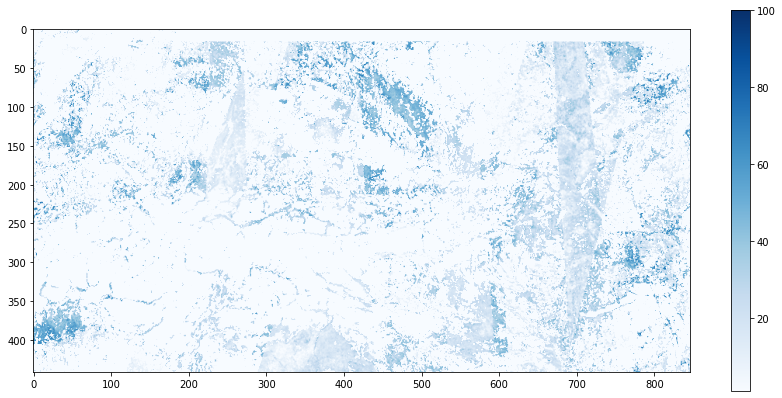

In [43]:
plt.figure(figsize=(50,7))
plt.subplot(1,3,1)
plt.imshow(winter, cmap = "Blues", vmin=1, vmax=100)   
plt.colorbar()

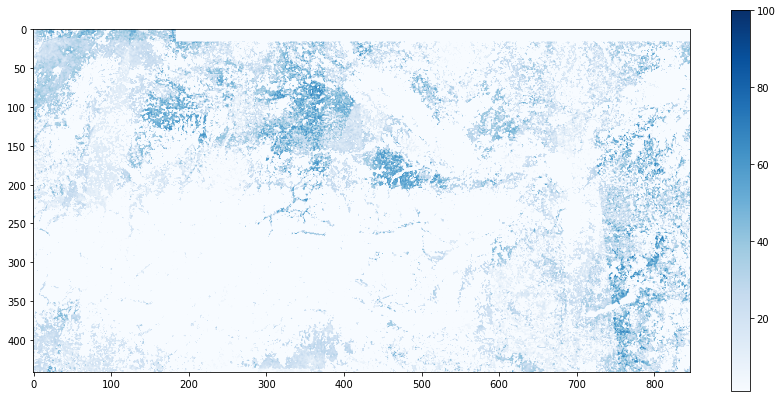

In [38]:
plt.figure(figsize=(50,7))
plt.subplot(1,3,1)
plt.imshow(summer, cmap = "Blues", vmin=1, vmax=100)   
plt.colorbar()

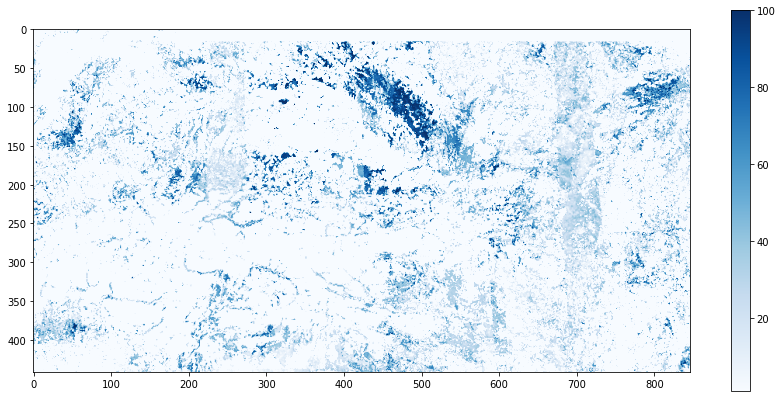

In [40]:
plt.figure(figsize=(50,7))
plt.subplot(1,3,1)
plt.imshow((winter - summer), cmap = "Blues", vmin=1, vmax=100)   
plt.colorbar()